In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
wine=pd.read_excel('wine_quality_red.xlsx')

In [3]:
wine

,fixed_acidity,volatile acid,citric acid,residual sugar,chorides,free sulfur dioxide,total sulfur dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wine['alcohol_cat']=pd.cut(wine['alcohol'],bins=[0,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])

In [5]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=(42))
for train_index,test_index in split.split(wine,wine['alcohol_cat']):
    strat_train_index=wine.loc[train_index].drop('alcohol_cat',axis=1)
    strat_test_index=wine.loc[test_index].drop('alcohol_cat',axis=1)

In [6]:
wine=strat_train_index.copy()

In [7]:
wine_labels=wine['quality'].copy()
wine=wine.drop('quality',axis=1)

In [8]:
wine

,fixed_acidity,volatile acid,citric acid,residual sugar,chorides,free sulfur dioxide,total sulfur dioxide,density,ph,sulphates,alcohol
211,8.0,0.725,0.24,2.8,0.083,10.0,62.0,0.99685,3.35,0.56,10.0
965,8.3,0.340,0.40,2.4,0.065,24.0,48.0,0.99554,3.34,0.86,11.0
1216,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5
1299,7.6,1.580,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9
644,9.9,0.540,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4
...,...,...,...,...,...,...,...,...,...,...,...
190,8.2,0.500,0.35,2.9,0.077,21.0,127.0,0.99760,3.23,0.62,9.4
986,9.8,0.340,0.39,1.4,0.066,3.0,7.0,0.99470,3.19,0.55,11.4
287,7.5,0.400,0.12,3.0,0.092,29.0,53.0,0.99670,3.37,0.70,10.3
500,7.8,0.520,0.25,1.9,0.081,14.0,38.0,0.99840,3.43,0.65,9.0


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [10]:
num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scalar',StandardScaler()),
])    

In [11]:
wine_prepared=num_pipeline.fit_transform(wine)

In [12]:
wine_prathamesh=pd.DataFrame(wine_prepared)

In [13]:
wine_prathamesh

,0,1,2,3,4,5,6,7,8,9,10
0,-0.184787,1.098682,-0.156272,0.186304,-0.100833,-0.555036,0.472719,0.045682,0.253962,-0.589985,-0.371523
1,-0.013648,-1.036775,0.678701,-0.090769,-0.474826,0.789909,0.049515,-0.640712,0.189527,1.229328,0.564941
2,-0.241833,0.238952,0.209029,-0.367841,-0.183943,-0.555036,0.986611,0.003765,-0.132649,0.198384,-0.839755
3,-0.412971,5.841059,-1.408731,-0.298573,1.021147,-1.035373,-1.129412,-1.049405,1.220489,-1.560285,0.471295
4,0.899090,0.072553,0.939630,-0.160037,-0.350162,0.021369,-0.192316,1.224603,0.511703,-0.226122,-0.933401
...,...,...,...,...,...,...,...,...,...,...,...
1274,-0.070694,-0.149313,0.417772,0.255572,-0.225497,0.501707,2.437598,0.438656,-0.519260,-0.226122,-0.933401
1275,0.842044,-1.036775,0.626515,-0.783450,-0.454049,-1.227508,-1.189870,-1.080843,-0.777000,-0.650628,0.939527
1276,-0.470018,-0.703977,-0.782501,0.324840,0.086164,1.270247,0.200659,-0.032913,0.382832,0.259028,-0.090583
1277,-0.298879,-0.038380,-0.104086,-0.437110,-0.142388,-0.170766,-0.252774,0.857828,0.769443,-0.044191,-1.307987


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(wine_prepared, wine_labels)

# Random Forest
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(wine_prepared, wine_labels)

# Predict using training data
lin_preds = lin_reg.predict(wine_prepared)
forest_preds = forest_reg.predict(wine_prepared)

# Calculate RMSE
lin_rmse = mean_squared_error(wine_labels, lin_preds)
forest_rmse = mean_squared_error(wine_labels, forest_preds)

print("Linear Regression RMSE:", lin_rmse)
print("Random Forest RMSE:", forest_rmse)

Linear Regression RMSE: 0.43519846255288597
Random Forest RMSE: 0.046956528537920254


In [15]:
# due to minimum error in the random forest we used randomforestregreesor
model=RandomForestRegressor(random_state=42)
model.fit(wine_prepared,wine_labels)

RandomForestRegressor(random_state=42)

In [16]:
testing_data=strat_test_index.drop('quality',axis=1)
testing_lables=strat_test_index['quality'].copy()

In [17]:
testing_data

,fixed_acidity,volatile acid,citric acid,residual sugar,chorides,free sulfur dioxide,total sulfur dioxide,density,ph,sulphates,alcohol
391,13.7,0.415,0.68,2.9,0.085,17.0,43.0,1.00140,3.06,0.80,10.0
835,7.6,0.665,0.10,1.5,0.066,27.0,55.0,0.99655,3.39,0.51,9.3
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5
1570,6.4,0.360,0.53,2.2,0.230,19.0,35.0,0.99340,3.37,0.93,12.4
794,10.1,0.270,0.54,2.3,0.065,7.0,26.0,0.99531,3.17,0.53,12.5
...,...,...,...,...,...,...,...,...,...,...,...
702,7.0,0.640,0.02,2.1,0.067,9.0,23.0,0.99700,3.47,0.67,9.4
151,9.2,0.520,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.4
1014,8.0,0.580,0.16,2.0,0.120,3.0,7.0,0.99454,3.22,0.58,11.2
640,9.9,0.540,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4


In [18]:
predictions=model.predict(testing_data)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [19]:
final=pd.DataFrame(predictions)

In [20]:
final

,0
0,5.80
1,5.86
2,5.76
3,5.71
4,5.81
...,...
315,5.86
316,5.72
317,5.76
318,5.77


In [21]:
predict=model.predict([[-0.184787	,1.098682,	-0.156272,	0.186304,	-0.100833,	-0.555036,	0.472719,	0.045682,	0.253962,	-0.589985	,-0.371523]])

In [22]:
predict

array([5.79])

In [23]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': ' fixed_acidity'}>,
        <Axes: title={'center': 'volatile acid'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': ' residual sugar'}>,
        <Axes: title={'center': 'chorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'ph'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>, <Axes: >]], dtype=object)

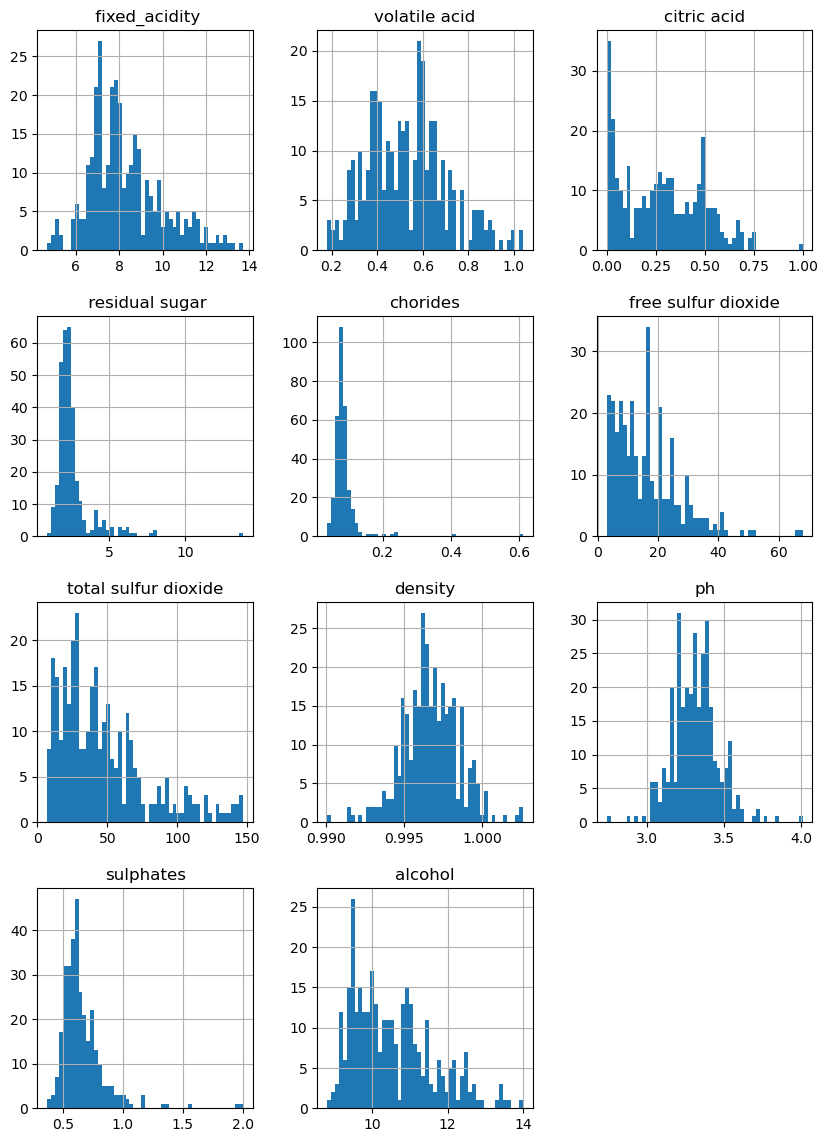

In [24]:
testing_data.hist(bins=50,figsize=(10,14))

In [25]:
lables=pd.DataFrame(testing_lables)

In [26]:
lables

,quality
391,6
835,5
1558,5
1570,6
794,6
...,...
702,6
151,4
1014,6
640,5


In [27]:
y_truth=np.array(lables)

In [28]:
y_predicted=np.array(final)

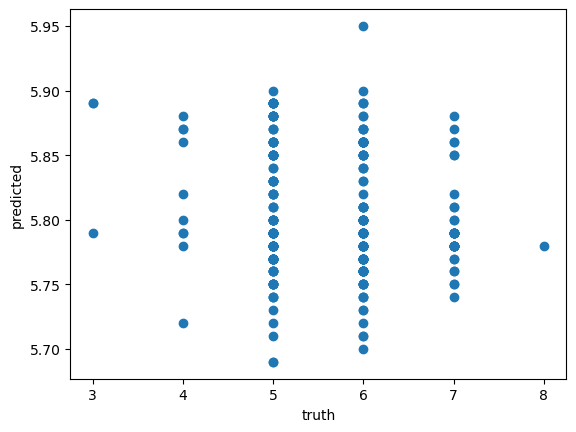

In [29]:
plt.scatter(y_truth,y_predicted)
plt.xlabel('truth')
plt.ylabel('predicted')
plt.show()